# Assignment 5
## Due May 29th
## Jennifer Them, Florence Lopez

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

np.random.seed(42)

## Exercise 1

### a)

In [38]:
candy = pd.read_csv("candy-data.csv")

In [47]:
names = candy.loc[:, 'competitorname']
Y = candy.loc[:, 'chocolate']
X = candy.loc[:, 'fruity'::]

### b)

In [51]:
length = candy.shape[0]
ind = np.floor(length/3)
X_train = X.values[: int(2*ind)]
Y_train = Y.values[: int(2*ind)]
X_test = X.values[int(2*ind):]
Y_test = Y.values[int(2*ind):]
X_train.shape, X_test.shape

((56, 11), (29, 11))

### c)

In [61]:
c = LogisticRegression() 
c.fit(X_train, Y_train)
Y_pred = c.predict(X_test)
Y_pred.shape

(29,)

In [72]:
# compute accuracy 
count = list(np.array(Y_pred == Y_test))
trues = count.count(1)
accuracy = trues/Y_pred.shape[0]
accuracy

0.8275862068965517

### d)

In [78]:
Cs =  [0.001, 0.01, 0.1, 1, 10, 100, 1000]
parameters = {'C': Cs}
clf = GridSearchCV(LogisticRegression(), parameters)
clf.fit(X_train, Y_train)
accuracy_cv = clf.cv_results_['mean_train_score']
accuracy_cv

array([0.46420104, 0.49122807, 0.9374111 , 0.96420104, 0.99099099,
       1.        , 1.        ])

In [80]:
test_accuracies = []
for param in Cs: 
    c = LogisticRegression(C = param) 
    c.fit(X_train, Y_train)
    Y_pred = c.predict(X_test)
    Y_pred.shape
    accuracy = c.score(X_test, Y_test)
    test_accuracies.append(accuracy)
test_accuracies

[0.3793103448275862,
 0.41379310344827586,
 0.8275862068965517,
 0.8275862068965517,
 0.8275862068965517,
 0.8620689655172413,
 0.7931034482758621]

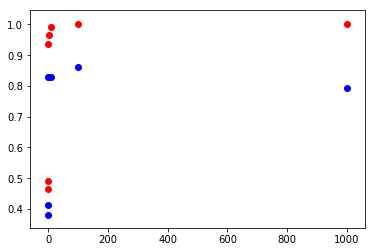

In [81]:
plt.figure()
plt.scatter(Cs, accuracy_cv, c="red")
plt.scatter(Cs, test_accuracies, c="blue")

## Exercise 2

In [4]:
X, Y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, random_state=300, class_sep=1)
X_train, Y_train = X[:300], Y[:300]
X_test, Y_test = X[300:], Y[300:]

### a)

### b)

### c)

In [5]:
Cs =  [0.001, 0.01, 0.1, 1, 10, 100, 1000]

### d)

In [6]:
with open("dataset_1.pickle", "rb") as f:
    X_1, Y_1 = pickle.load(f)
X_1_train, Y_1_train = X_1[:100], Y_1[:100]
X_1_test, Y_1_test = X_1[100:], Y_1[100:]

In [7]:
with open("dataset_2.pickle", "rb") as f:
    X_2, Y_2 = pickle.load(f)
X_2_train, Y_2_train = X_2[:100], Y_2[:100]
X_2_test, Y_2_test = X_2[100:], Y_2[100:]